## Running a Regression in Python

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

*A teacher at school decided her students should take an IQ test. She prepared 5 tests she believed were aligned with the requirements of the IQ examination.
The father of one child in the class turned out to be an econometrician, so he asked her for the results of the 30 kids. The file contained the points they earned on each test and the final IQ score.*

Load the IQ_data excel file. 

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
iq_data=pd.read_excel('IQ_data.xlsx')

In [4]:
iq_data.head()

,IQ,Test 1,Test 2,Test 3,Test 4,Test 5
0,107,84,35,66,64,65
1,93,74,20,74,49,83
2,103,55,82,83,66,74
3,122,97,73,92,89,95
4,103,85,54,73,69,83


In [5]:
iq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
IQ        30 non-null int64
Test 1    30 non-null int64
Test 2    30 non-null int64
Test 3    30 non-null int64
Test 4    30 non-null int64
Test 5    30 non-null int64
dtypes: int64(6)
memory usage: 1.5 KB


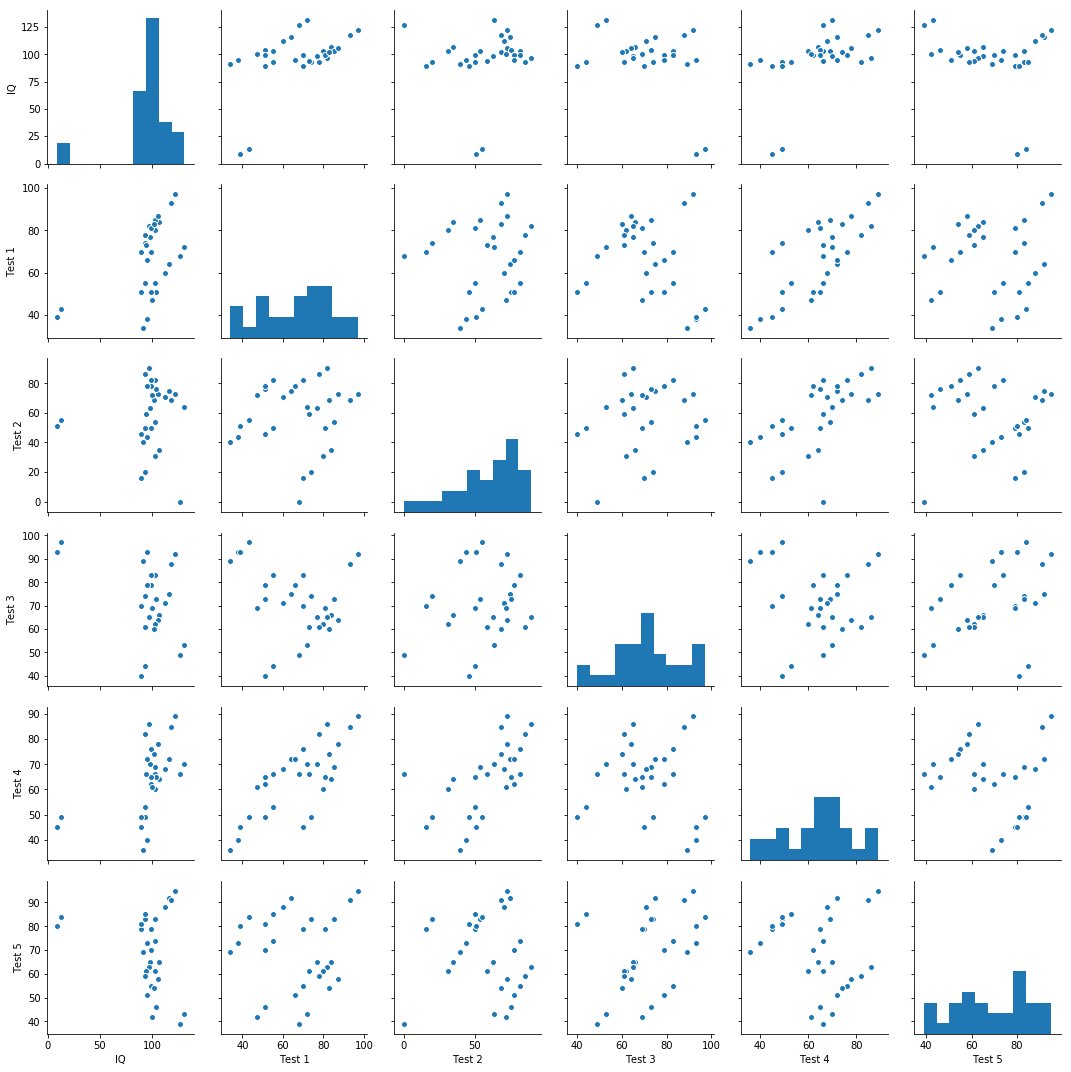

In [8]:
#but first, data visualization
#What are the data distributions and eventual correlations among variables?
sns.pairplot(iq_data)

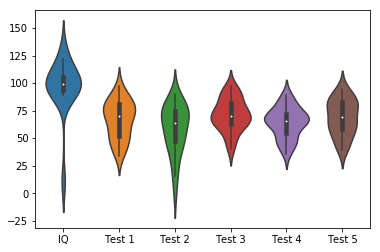

In [14]:
sns.violinplot(data=iq_data)

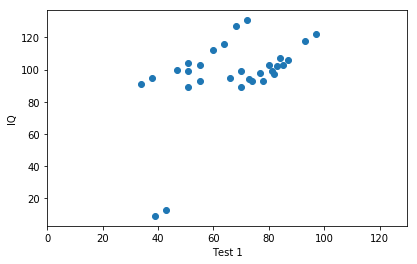

In [30]:
fig=plt.figure(figsize=(5,3))
ax=plt.axes([0,0,1,1])
ax.set_xlim([0,100])
ax.set_xlim([0,130])
ax.set_xlabel("Test 1")
ax.set_ylabel("IQ")
ax.scatter(y=iq_data['IQ'], x=iq_data['Test 1'])

In [12]:
iq_data.corr()['IQ']

IQ        1.000000
Test 1    0.508567
Test 2    0.074087
Test 3   -0.392851
Test 4    0.508041
Test 5   -0.233539
Name: IQ, dtype: float64

In [13]:
X=iq_data['Test 1']
Y=iq_data['IQ']

Prepare the data for a univariate regression of Test 1 based on the IQ result. Store the Test 1 scores in a variable, called X, and the IQ points in another variable, named Y. 

### Univariate Regression

In [31]:
X1=sm.add_constant(X)

In [38]:
model=sm.OLS(Y, X1)
reg=model.fit()  

In [40]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     IQ   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     9.768
Date:                Tue, 16 Jun 2020   Prob (F-statistic):            0.00411
Time:                        19:27:29   Log-Likelihood:                -134.94
No. Observations:                  30   AIC:                             273.9
Df Residuals:                      28   BIC:                             276.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.8828     16.760      2.738      0.011      11.552      80.213
Test 1         0.7587      0.243      3.125      0.004       0.261       1.256
==============================================================================
Omnibus:                       18.268   Durbin-Watson:                   2.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.621
Skew:                          -1.535   Prob(JB):                     7.43e-06
Kurtosis:                       6.077   Cond. No.                         282.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Create a well-organized scatter plot. Use the “axis” method with the following start and end points: [0, 120, 0, 150]. Label the axes “Test 1” and “IQ”, respectively.

Just by looking at the graph, do you believe Test 1 is a good predictor of the final IQ score?

No